In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 

%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Salary%20Data.csv')

In [4]:
df.shape

(40, 2)

In [5]:
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 772.0 bytes


In [7]:
df.describe()

,Experience Years,Salary
count,40.000000,40.000000
mean,5.152500,74743.625000
std,2.663715,25947.122885
min,1.100000,37731.000000
25%,3.200000,56878.250000
50%,4.600000,64472.500000
75%,6.875000,95023.250000
max,10.500000,122391.000000


Text(0, 0.5, 'Salary')

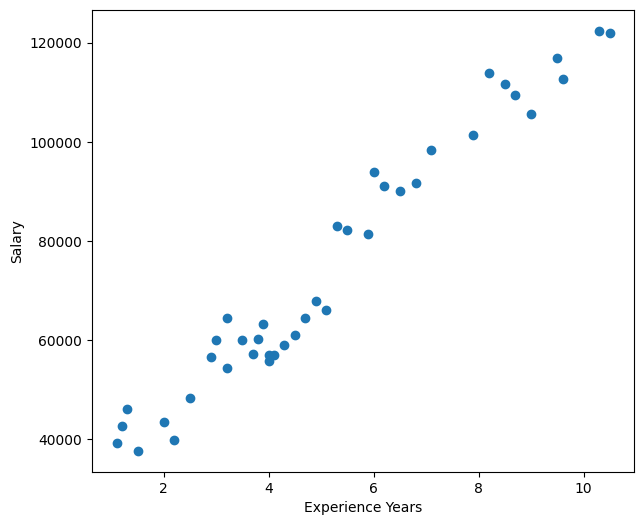

In [8]:
plt.figure(figsize=(7,6))
plt.scatter(x= df['Experience Years'], y= df['Salary'])
plt.xlabel('Experience Years')
plt.ylabel('Salary')

# Seprating the Independent and Dependent variable

In [30]:
X = df[['Experience Years']]
y = df["Salary"]

In [31]:
X.head()

,Experience Years
0,1.1
1,1.2
2,1.3
3,1.5
4,2.0


In [32]:
y.head()

0    39343
1    42774
2    46205
3    37731
4    43525
Name: Salary, dtype: int64

# Perform train test split 

In [33]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [34]:
X_train.shape , X_test.shape

((32, 1), (8, 1))

In [36]:
X_train.head()

,Experience Years
39,10.5
6,2.5
25,5.9
9,3.2
13,3.8


In [37]:
X_test.head()

,Experience Years
19,4.5
16,4.0
15,4.0
26,6.0
4,2.0


In [38]:
X_train.head()

,Experience Years
39,10.5
6,2.5
25,5.9
9,3.2
13,3.8


In [35]:
y_train.shape, y_test.shape

((32,), (8,))

In [16]:
y_train.head()

39    121872
6      48266
25     81363
9      54445
13     60200
Name: Salary, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [18]:
Xtrain_scaled = scaler.fit_transform(X_train)

In [19]:
Xtest_scaled = scaler.transform(X_test)

In [39]:
Xtrain_scaled

array([[ 1.93892298],
       [-0.98258545],
       [ 0.25905563],
       [-0.72695347],
       [-0.50784033],
       [ 0.98943274],
       [ 1.28158358],
       [-0.79999118],
       [-0.39828377],
       [ 0.11298021],
       [-1.49384943],
       [ 1.20854587],
       [-1.09214202],
       [-0.6173969 ],
       [-1.45733057],
       [ 0.58772533],
       [-0.10613292],
       [-1.42081172],
       [ 0.6972819 ],
       [ 1.57373443],
       [-1.34777401],
       [ 1.39114015],
       [ 0.0399425 ],
       [ 1.09898931],
       [-0.72695347],
       [-0.03309521],
       [-0.32524606],
       [-0.17917063],
       [-0.83651003],
       [-0.47132148],
       [ 0.47816876],
       [ 1.86588527]])

In [40]:
Xtest_scaled

array([[-0.25220835],
       [-0.43480262],
       [-0.43480262],
       [ 0.29557449],
       [-1.16517973],
       [-0.54435919],
       [ 1.61025328],
       [ 0.3686122 ]])

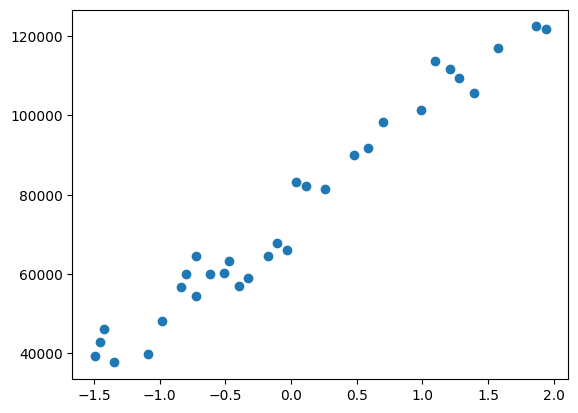

In [42]:
plt.scatter(Xtrain_scaled,y_train)

In [43]:
Xtrain_scaled.mean()

5.551115123125783e-17

In [44]:
Xtrain_scaled.std()

1.0

In [47]:
scaler.transform([[4.5]])

array([[-0.25220835]])

## Model traning

In [48]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [49]:
regression.fit(Xtrain_scaled,y_train)

LinearRegression()

In [50]:
regression.intercept_

75549.8125

In [51]:
regression.coef_

array([25762.11977638])

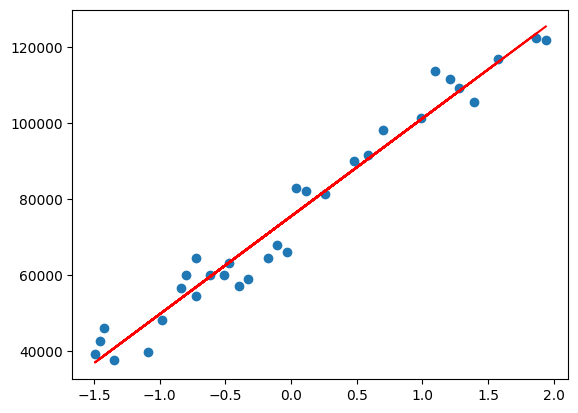

In [52]:
plt.scatter(Xtrain_scaled,y_train)
plt.plot(Xtrain_scaled,regression.predict(Xtrain_scaled),'r')

In [55]:
y_pred = regression.predict(Xtest_scaled)
y_pred

array([ 69052.39090243,  64348.37526617,  64348.37526617,  83164.43781119,
        45532.31272116,  61525.96588442, 117033.35039221,  85046.04406569])

In [56]:
y_test

19     61111
16     56957
15     55794
26     93940
4      43525
12     57189
37    112635
27     91000
Name: Salary, dtype: int64

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_squared_error(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
rmse = np.sqrt(mse)

In [60]:
print(mae)
print(mse)
print(rmse)

48077731.1691936
48077731.1691936
6933.810724932835


In [62]:
from sklearn.metrics import r2_score

score = r2_score(y_pred,y_test)
score

0.8810764392836916

In [64]:
## Adj r2 score
1 - (1-score) * (len(y_test)-1) / (len(y_test)-X_test.shape[1] - 1)

0.8612558458309736